In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap.plot
import umap
from sklearn.preprocessing import StandardScaler

from pylab import rcParams

rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'

%matplotlib inline

/Users/Bear/anaconda3/lib/python3.11/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [2]:
data_df = pd.read_pickle('age-related_macular_degeneration.pkl')
data_df

,index,year,title,journal,abstract,abstract_embeddings
0,0,2024,Switching to the aflibercept (3 mg) therapy fo...,Medicine (Baltimore),This study aimed to elucidate 1-year outcomes ...,"[0.2563925087451935, -0.9002563953399658, -0.9..."
1,1,2024,Longitudinal Evaluation of the Distribution of...,Curr Eye Res,PURPOSE: Intraretinal hyper-reflective foci (I...,"[-0.07866641879081726, -0.12973375618457794, -..."
2,2,2024,Restoring retinal polyunsaturated fatty acid b...,J Biol Chem,Mutations in the adiponectin receptor 1 gene (...,"[-0.3950583040714264, -0.46726280450820923, -0..."
3,4,2024,LXR/CD38 activation drives cholesterol-induced...,Cell Rep,Although dysregulated cholesterol metabolism p...,"[-0.13269086182117462, -0.6397832632064819, 0...."
4,5,2024,Visual outcomes of intraocular inflammation af...,PLoS One,PURPOSE: This study investigates the visual ou...,"[-0.12591667473316193, 0.11253900080919266, -0..."
...,...,...,...,...,...,...
450,490,2024,Surgical management of a case of double optic ...,Indian J Ophthalmol,BACKGROUND: Double optic disc pit maculopathy ...,"[-0.00719088688492775, -0.6227936744689941, -0..."
451,495,2024,Mutations in SAMD7 cause autosomal-recessive m...,Am J Hum Genet,Sterile alpha motif domain containing 7 (SAMD7...,"[0.02577684260904789, -0.24919262528419495, -0..."
452,496,2024,Aspirin intake is not associated with diabetic...,Indian J Ophthalmol,PURPOSE: We aimed to study the effects of aspi...,"[-0.47645801305770874, -0.46703678369522095, -..."
453,497,2024,Assessment of vision-related quality of life a...,Indian J Ophthalmol,PURPOSE: To evaluate the effect of age-related...,"[0.034589916467666626, -1.1453418731689453, -0..."


In [3]:
data_df = data_df.dropna().reset_index()

/Users/Bear/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/Bear/anaconda3/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


<Axes: >

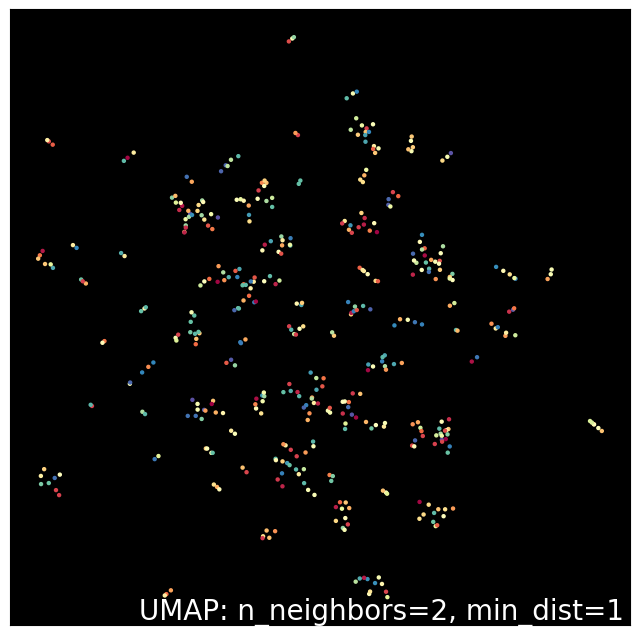

In [17]:
embedding_data = np.stack(data_df['abstract_embeddings'], axis=0 )
scaled_embedding_data = StandardScaler().fit_transform(embedding_data)
reducer = umap.UMAP(n_neighbors=2, min_dist=1)
mapper = reducer.fit(scaled_embedding_data)
umap.plot.points(mapper, labels = data_df['journal'], theme='viridis', show_legend=False)

In [8]:
hover_data = pd.DataFrame({'index':data_df.index,
                           'label':data_df['journal'],
                          'title':data_df['title'].map(lambda x: x[:100]),
                          'text':data_df['abstract'].map(lambda x: x[:50])})
p = umap.plot.interactive(mapper, labels = data_df['journal'], hover_data = hover_data, point_size=5)
umap.plot.show(p)